In [4]:
#| include: false
import pandas as pd

# Display all columns
pd.set_option('display.max_columns', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Week 1

## Walkthrough 1.1: Getting Started

### Setting Up the Python Environment

If you haven't already installed Python, Jupyter, and the necessary packages, there are instructions on the course repo in the README to do so [here](https://github.com/ismayc/oreilly-fundamentals-of-statistics-with-python/blob/main/README.md). 

If you aren't able to do this on your machine, you may want to check out [Google Colab](https://colab.research.google.com/). It's a free service that allows you to run Jupyter notebooks in the cloud.

In [1]:
# Importing libraries/modules and aliasing them as needed
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Exploring a dataset

In [2]:
# Load in the dataset
data_dev_survey = pd.read_csv("data_dev_survey.csv")

In [4]:
# Display information about the DataFrame
data_dev_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   response_id                 1183 non-null   int64  
 1   work_as_dev                 1183 non-null   object 
 2   age                         1183 non-null   object 
 3   employment                  1183 non-null   object 
 4   remote_work                 1183 non-null   object 
 5   coding_activities           1182 non-null   object 
 6   ed_level                    1183 non-null   object 
 7   dev_type                    1183 non-null   object 
 8   years_code                  1182 non-null   float64
 9   years_code_pro              1183 non-null   int64  
 10  org_size                    1183 non-null   object 
 11  country                     1183 non-null   object 
 12  language_have_worked_with   1183 non-null   object 
 13  language_want_to_work_with  1116 

### Performing basic statistical functions using NumPy, Pandas, and SciPy.

#### Using NumPy

In [5]:
# Calculate the mean of the years_code_pro column
np.mean(data_dev_survey['years_code_pro'])

7.961115807269653

In [6]:
# Calculate the median of the work_exp column
np.median(data_dev_survey['work_exp'])

7.0

In [7]:
# Calculate the standard deviation of the converted_comp_yearly column
np.std(data_dev_survey['converted_comp_yearly'])

81861.24268446874

#### Using Pandas

In [8]:
# Display summary statistics on the numeric columns of the DataFrame
data_dev_survey.describe()

,response_id,years_code,years_code_pro,work_exp,converted_comp_yearly
count,1183.000000,1182.000000,1183.000000,1183.000000,1.183000e+03
mean,43949.774303,12.534687,7.961116,9.650042,9.068442e+04
std,25327.979423,8.384094,7.153751,8.189750,8.189586e+04
min,164.000000,1.000000,0.000000,0.000000,3.000000e+00
25%,22733.000000,7.000000,3.000000,4.000000,4.159300e+04
50%,43305.000000,10.000000,6.000000,7.000000,7.271400e+04
75%,65791.000000,16.000000,10.000000,13.000000,1.200000e+05
max,89072.000000,50.000000,50.000000,48.000000,1.200000e+06


#### Using SciPy

In [9]:
# Separate the data into two groups
using_ai = data_dev_survey[data_dev_survey['plans_to_use_ai'] == 'Using']['converted_comp_yearly']
plan_to_use_ai = data_dev_survey[data_dev_survey['plans_to_use_ai'] == 'Plan to use']['converted_comp_yearly']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(using_ai, plan_to_use_ai, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 0.9293366153676751
P-value: 0.3529304815725288


## Exercise 1.1: Getting Started

### Setting Up the Python Environment

If you ran the `# Importing libraries and aliasing them` code above, you should 
be good to proceed here. If not, scroll up and run it.

### Exploring a dataset

In [3]:
# Load in the coffee_quality dataset
coffee_quality = pd.read_csv("coffee_quality.csv")

In [11]:
# Display information about the DataFrame
coffee_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_of_origin    207 non-null    object 
 1   continent_of_origin  207 non-null    object 
 2   farm_name            205 non-null    object 
 3   lot_number           206 non-null    object 
 4   mill                 204 non-null    object 
 5   company              207 non-null    object 
 6   altitude             206 non-null    object 
 7   region               205 non-null    object 
 8   producer             206 non-null    object 
 9   in_country_partner   207 non-null    object 
 10  harvest_year         207 non-null    object 
 11  grading_date         207 non-null    object 
 12  owner                207 non-null    object 
 13  variety              201 non-null    object 
 14  processing_method    202 non-null    object 
 15  aroma                207 non-null    flo

### Performing basic statistical functions using NumPy, Pandas, and SciPy.

#### Using NumPy

In [12]:
# Calculate the mean of the aroma column
np.mean(coffee_quality['aroma'])

7.721062801932368

In [13]:
# Calculate the median of the total_cup_points column
np.median(coffee_quality['total_cup_points'])

83.75

In [14]:
# Calculate the standard deviation of the moisture_percentage column
np.std(coffee_quality['moisture_percentage'])

1.2444515707780472

#### Using Pandas

In [15]:
# Display summary statistics on the numeric columns of the DataFrame
coffee_quality.describe()

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,overall,total_cup_points,moisture_percentage
count,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.0,207.0,207.000000,207.000000,207.000000
mean,7.721063,7.744734,7.599758,7.69029,7.640918,7.644058,9.990338,10.0,10.0,7.676812,83.706570,10.735266
std,0.287626,0.279613,0.275911,0.25951,0.233499,0.256299,0.103306,0.0,0.0,0.306359,1.730417,1.247468
min,6.500000,6.750000,6.670000,6.83000,6.830000,6.670000,8.670000,10.0,10.0,6.670000,78.000000,0.000000
25%,7.580000,7.580000,7.420000,7.50000,7.500000,7.500000,10.000000,10.0,10.0,7.500000,82.580000,10.100000
50%,7.670000,7.750000,7.580000,7.67000,7.670000,7.670000,10.000000,10.0,10.0,7.670000,83.750000,10.800000
75%,7.920000,7.920000,7.750000,7.87500,7.750000,7.790000,10.000000,10.0,10.0,7.920000,84.830000,11.500000
max,8.580000,8.500000,8.420000,8.58000,8.250000,8.420000,10.000000,10.0,10.0,8.580000,89.330000,13.500000


#### Using SciPy

In [16]:
# Focus on only Asia and North America entries

# Separate the data into two groups
asian = coffee_quality[coffee_quality['continent_of_origin'] == 'Asia']['total_cup_points']
north_american = coffee_quality[coffee_quality['continent_of_origin'] == 'North America']['total_cup_points']

# Perform the t-test comparing mean total_cup_points
t_stat, p_value = stats.ttest_ind(asian, north_american, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 2.5481369690475355
P-value: 0.011898171131418231


---

## Walkthrough 1.2: Data Summarizing

### Compute and interpret measures of central tendency 

In [17]:
# Calculate center statistics for years_code_pro
data_dev_survey['years_code_pro'].mean()
data_dev_survey['years_code_pro'].median()
data_dev_survey['years_code_pro'].mode()

# To extract just the value for mode
data_dev_survey['years_code_pro'].mode()[0]

2

### Compute and interpret measures of variation

In [18]:
# Calculate spread statistics for years_code_pro
range_years_code_pro = data_dev_survey['years_code_pro'].max() - data_dev_survey['years_code_pro'].min()
range_years_code_pro

data_dev_survey['years_code_pro'].var(ddof=1)
data_dev_survey['years_code_pro'].std(ddof=1)

7.153750884326607

In [19]:
# Calculate the five-number summary for 'years_code_pro'
min_years_code_pro = data_dev_survey['years_code_pro'].min()
q1_years_code_pro = data_dev_survey['years_code_pro'].quantile(0.25)
median_years_code_pro = data_dev_survey['years_code_pro'].median()
q3_years_code_pro = data_dev_survey['years_code_pro'].quantile(0.75)
max_years_code_pro = data_dev_survey['years_code_pro'].max()

# Print them out
print(f"Five-Number Summary for years_code_pro:")
print(f"Minimum: {min_years_code_pro}")
print(f"First Quartile (Q1): {q1_years_code_pro}")
print(f"Median (Q2): {median_years_code_pro}")
print(f"Third Quartile (Q3): {q3_years_code_pro}")
print(f"Maximum: {max_years_code_pro}")

Five-Number Summary for years_code_pro:
Minimum: 0
First Quartile (Q1): 3.0
Median (Q2): 6.0
Third Quartile (Q3): 10.0
Maximum: 50


## Exercise 1.2: Data Summarizing

In [20]:
# Calculate center statistics for 'aroma'
mean_aroma = coffee_quality['aroma'].mean()
median_aroma = coffee_quality['aroma'].median()
mode_aroma = coffee_quality['aroma'].mode()[0]

print(f"Mean of aroma: {mean_aroma}")
print(f"Median of aroma: {median_aroma}")
print(f"Mode of aroma: {mode_aroma}")

Mean of aroma: 7.721062801932368
Median of aroma: 7.67
Mode of aroma: 7.67


In [21]:
# Calculate spread statistics for 'aroma'
range_aroma = coffee_quality['aroma'].max() - coffee_quality['aroma'].min()
variance_aroma = coffee_quality['aroma'].var(ddof=1)  # Sample variance
std_dev_aroma = coffee_quality['aroma'].std(ddof=1)  # Sample standard deviation

print(f"Range of aroma: {range_aroma}")
print(f"Variance of aroma: {variance_aroma}")
print(f"Standard Deviation of aroma: {std_dev_aroma}")

Range of aroma: 2.08
Variance of aroma: 0.08272896205618872
Standard Deviation of aroma: 0.2876264279515857


In [22]:
# Calculate the five-number summary for 'aroma'
min_aroma = coffee_quality['aroma'].min()
q1_aroma = coffee_quality['aroma'].quantile(0.25)
median_aroma = coffee_quality['aroma'].median()
q3_aroma = coffee_quality['aroma'].quantile(0.75)
max_aroma = coffee_quality['aroma'].max()

print(f"Five-Number Summary for aroma:")
print(f"Minimum: {min_aroma}")
print(f"First Quartile (Q1): {q1_aroma}")
print(f"Median (Q2): {median_aroma}")
print(f"Third Quartile (Q3): {q3_aroma}")
print(f"Maximum: {max_aroma}")

Five-Number Summary for aroma:
Minimum: 6.5
First Quartile (Q1): 7.58
Median (Q2): 7.67
Third Quartile (Q3): 7.92
Maximum: 8.58


## Walkthrough 1.3: Cleaning and Preparing Data with Pandas

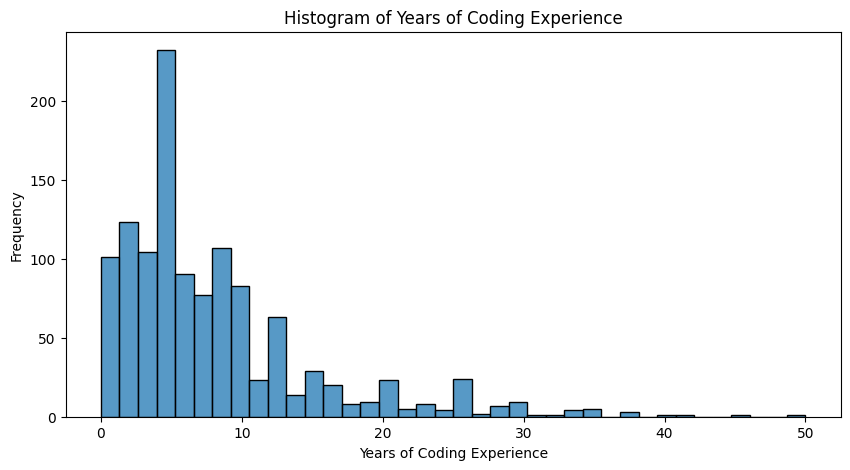

In [23]:
# Histogram for years_code_pro
plt.figure(figsize=(10, 5))
sns.histplot(data_dev_survey['years_code_pro'])
plt.title('Histogram of Years of Coding Experience')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Frequency')
plt.show()

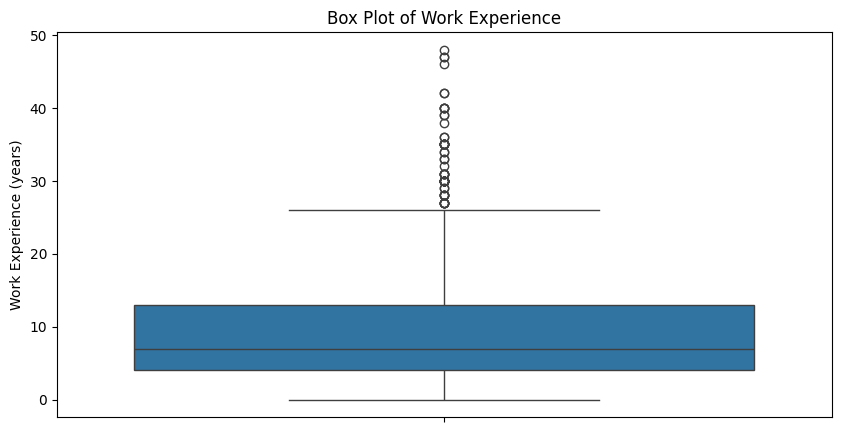

In [24]:
# Box plot for work_exp
plt.figure(figsize=(10, 5))
sns.boxplot(y=data_dev_survey['work_exp'])
plt.title('Box Plot of Work Experience')
plt.ylabel('Work Experience (years)')
plt.show()

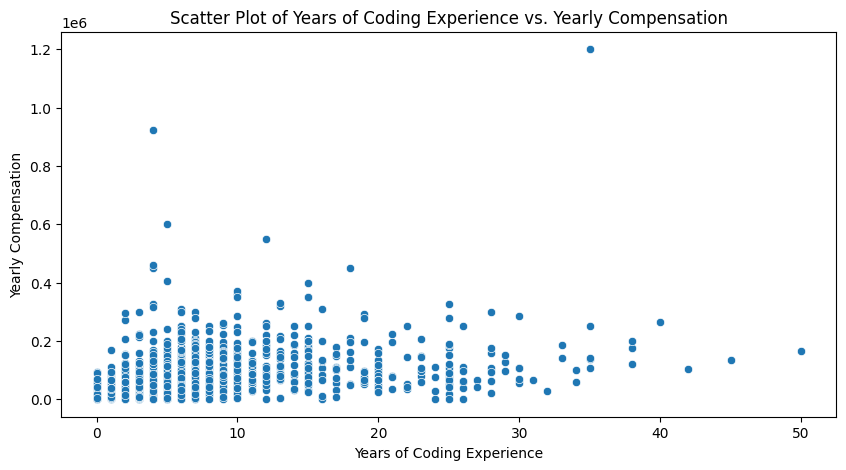

In [25]:
# Scatter plot for years_code_pro vs. converted_comp_yearly
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data_dev_survey['years_code_pro'], y=data_dev_survey['converted_comp_yearly'])
plt.title('Scatter Plot of Years of Coding Experience vs. Yearly Compensation')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Yearly Compensation')
plt.show()

## Exercise 1.3: Cleaning and Preparing Data with Pandas

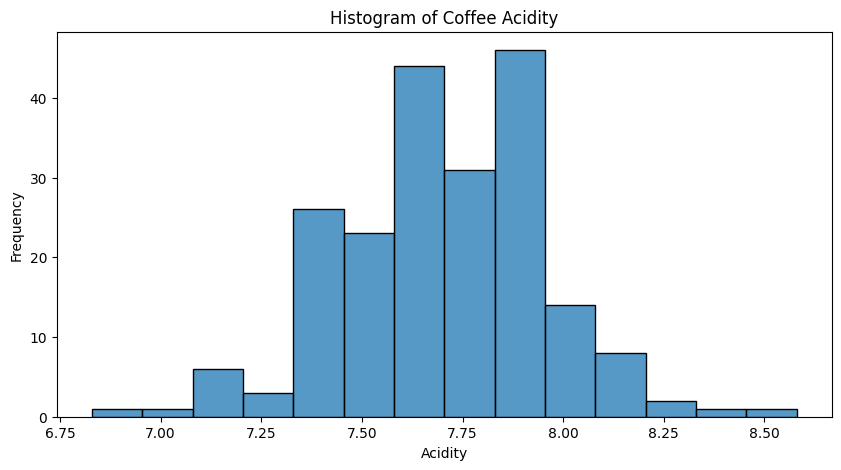

In [26]:
# Histogram for acidity
plt.figure(figsize=(10, 5))
sns.histplot(coffee_quality['acidity'])
plt.title('Histogram of Coffee Acidity')
plt.xlabel('Acidity')
plt.ylabel('Frequency')
plt.show()

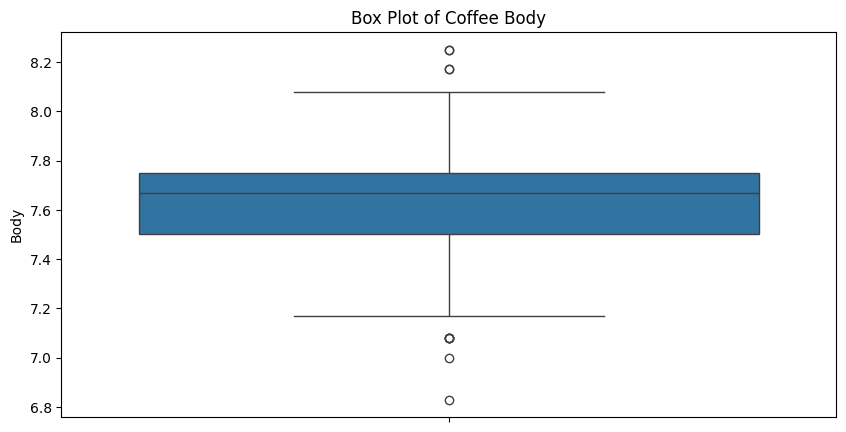

In [27]:
# Box plot for body
plt.figure(figsize=(10, 5))
sns.boxplot(y=coffee_quality['body'])
plt.title('Box Plot of Coffee Body')
plt.ylabel('Body')
plt.show()

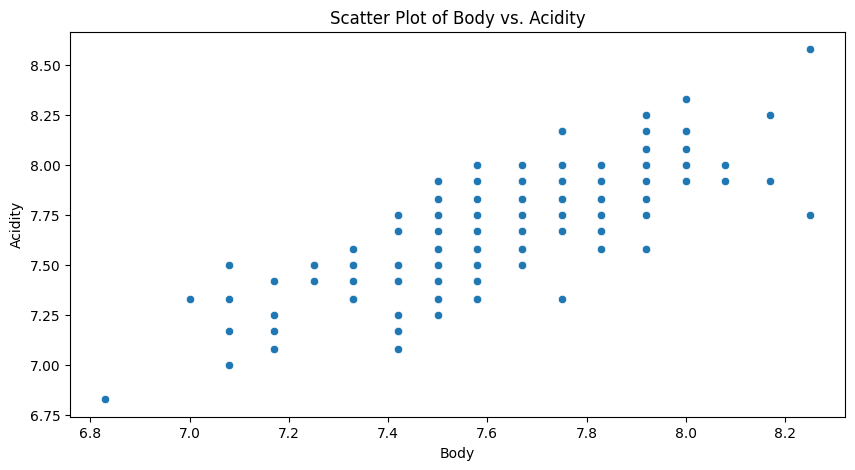

In [28]:
# Scatter plot for body vs. acidity
plt.figure(figsize=(10, 5))
sns.scatterplot(x=coffee_quality['body'], y=coffee_quality['acidity'])
plt.title('Scatter Plot of Body vs. Acidity')
plt.xlabel('Body')
plt.ylabel('Acidity')
plt.show()

---

## Walkthrough 1.4: Sampling Distribution Generation

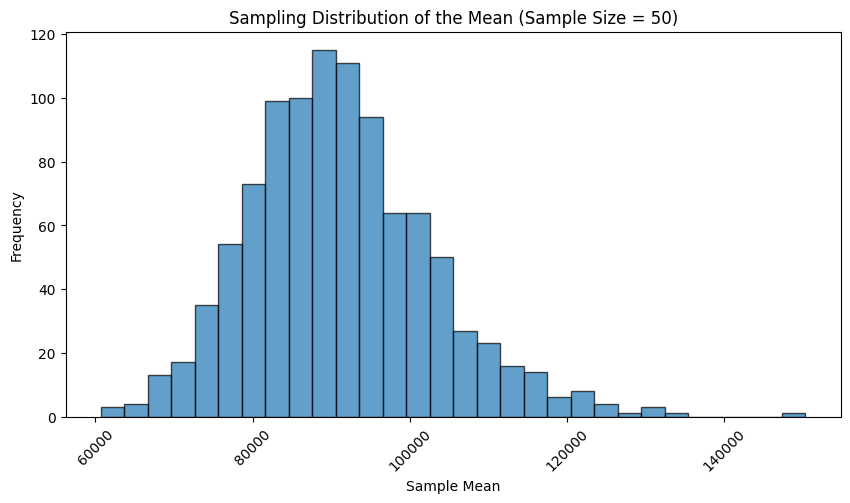

In [29]:
# Think of our data as a population to draw from
population = data_dev_survey['converted_comp_yearly'].dropna().values

# Generate a large sample from the 'converted_comp_yearly' column
# Parameters
sample_size = 50
num_samples = 1000

# Set a seed to make code reproducible
np.random.seed(2024)

# Simulate sampling distribution of the mean
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(population, sample_size)
    sample_means.append(np.mean(sample))

# Plot the sampling distribution of the sample means
plt.figure(figsize=(10, 5))
plt.hist(sample_means, bins=30, edgecolor='k', alpha=0.7)
plt.title('Sampling Distribution of the Mean (Sample Size = 50)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Exercise 1.4: Sampling Distribution Generation

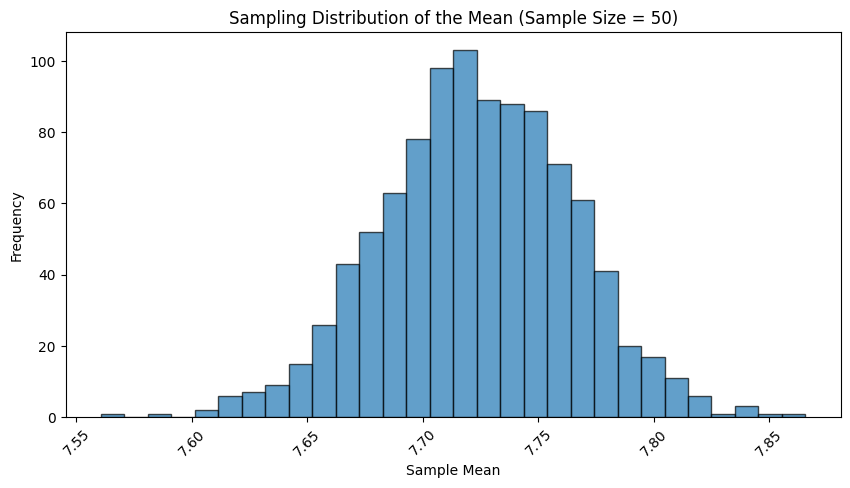

In [30]:
# Think of our aroma data as a population to draw from
population = coffee_quality['aroma'].dropna().values

# Parameters
sample_size = 50
num_samples = 1000

# Set random seed
np.random.seed(2024)

# Simulate sampling distribution of the mean
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(population, sample_size)
    sample_means.append(np.mean(sample))

# Plot the sampling distribution of the sample means
plt.figure(figsize=(10, 5))
plt.hist(sample_means, bins=30, edgecolor='k', alpha=0.7)
plt.title('Sampling Distribution of the Mean (Sample Size = 50)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Week 2

## Walkthrough 2.1: Advanced Plots

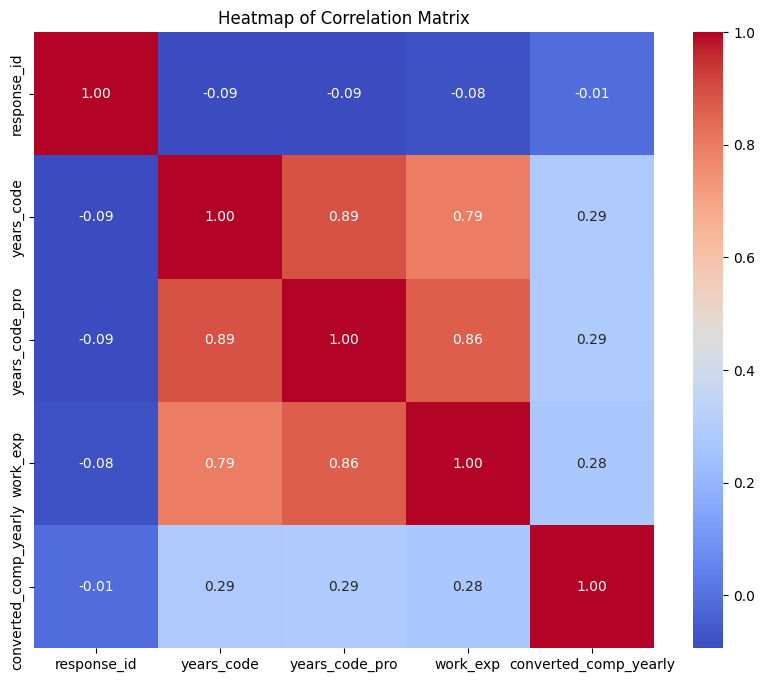

In [31]:
# Select only numeric columns
numeric_columns = data_dev_survey.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

<Figure size 1200x800 with 0 Axes>

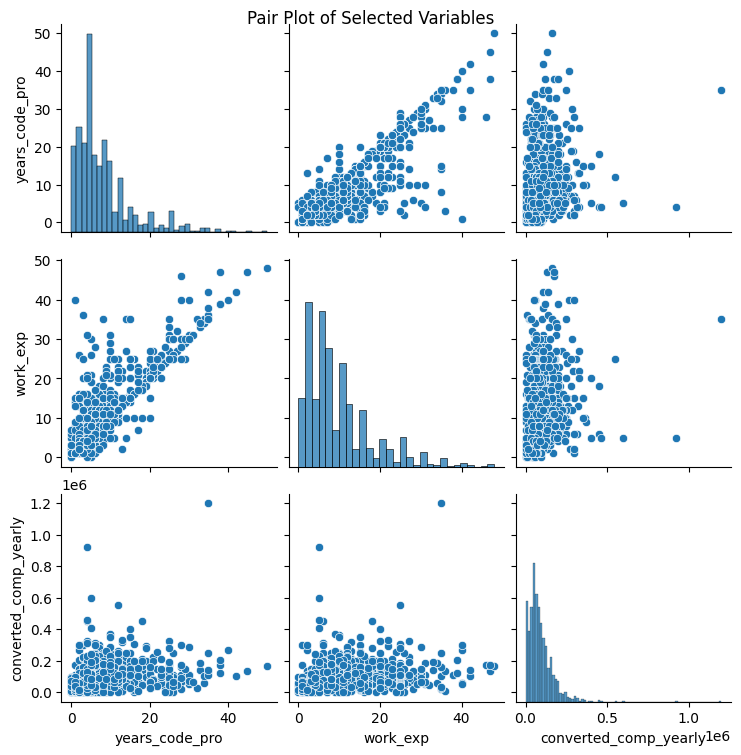

In [32]:
# Pair plot for selected variables 'years_code_pro', 'work_exp', 'converted_comp_yearly'
plt.figure(figsize=(12, 8))
sns.pairplot(data_dev_survey, vars=['years_code_pro', 'work_exp', 'converted_comp_yearly'])
plt.suptitle('Pair Plot of Selected Variables', y=1)
plt.show()

<Figure size 1200x600 with 0 Axes>

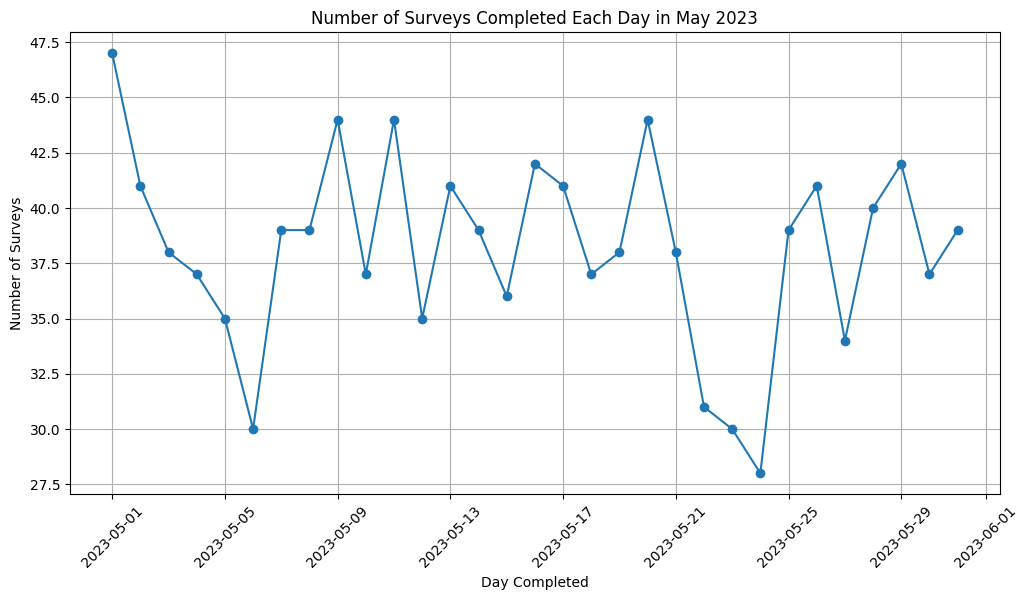

In [33]:
# Time series plot
plt.figure(figsize=(12, 6))
data_dev_survey['survey_completion_date'] = pd.to_datetime(data_dev_survey['survey_completion_date'])

# Count the number of surveys completed each day
daily_counts = data_dev_survey['survey_completion_date'].value_counts().sort_index()

# Also show group_by here to make the exercise easier

# Plot the counts as a line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o')
plt.title('Number of Surveys Completed Each Day in May 2023')
plt.xlabel('Day Completed')
plt.ylabel('Number of Surveys')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Exercise 2.1: Advanced Plots

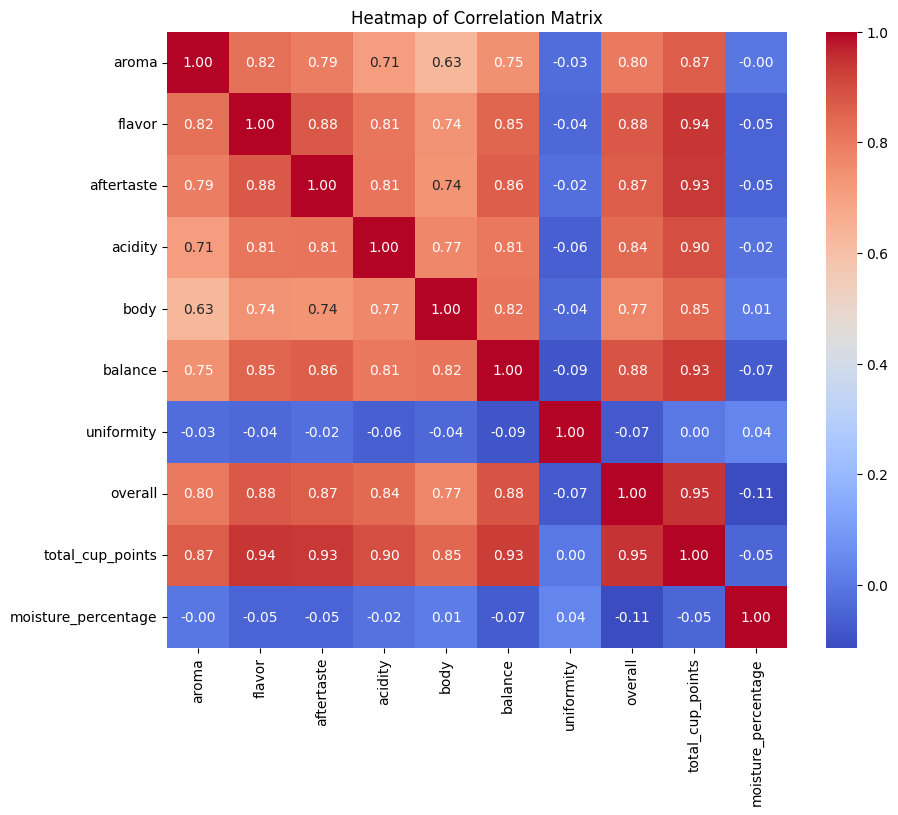

In [34]:
# Select only numeric columns
numeric_columns = coffee_quality.select_dtypes(include=[np.number])

# Drop the 'clean_cup' and 'sweetness' columns since they are always 10
numeric_columns = numeric_columns.drop(columns=['clean_cup', 'sweetness'], errors='ignore')

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8));
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f');
plt.title('Heatmap of Correlation Matrix');

<Figure size 1200x800 with 0 Axes>

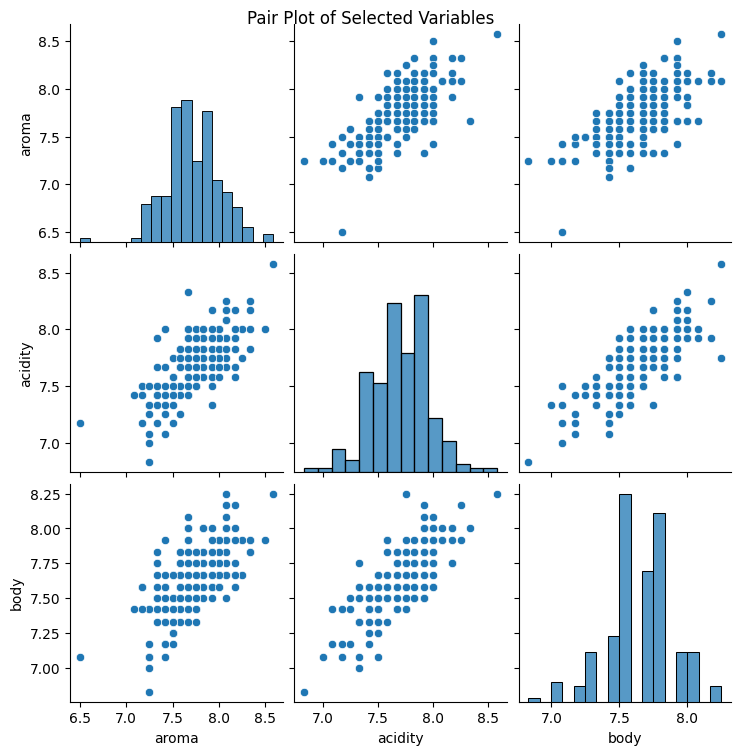

In [35]:
# Pair plot for selected variables ['aroma', 'acidity', 'body']
plt.figure(figsize=(12, 8))
sns.pairplot(coffee_quality, vars=['aroma', 'acidity', 'body'])
plt.suptitle('Pair Plot of Selected Variables', y=1)
plt.show()

<!-- Need to introduce them to dt.to_period() -->

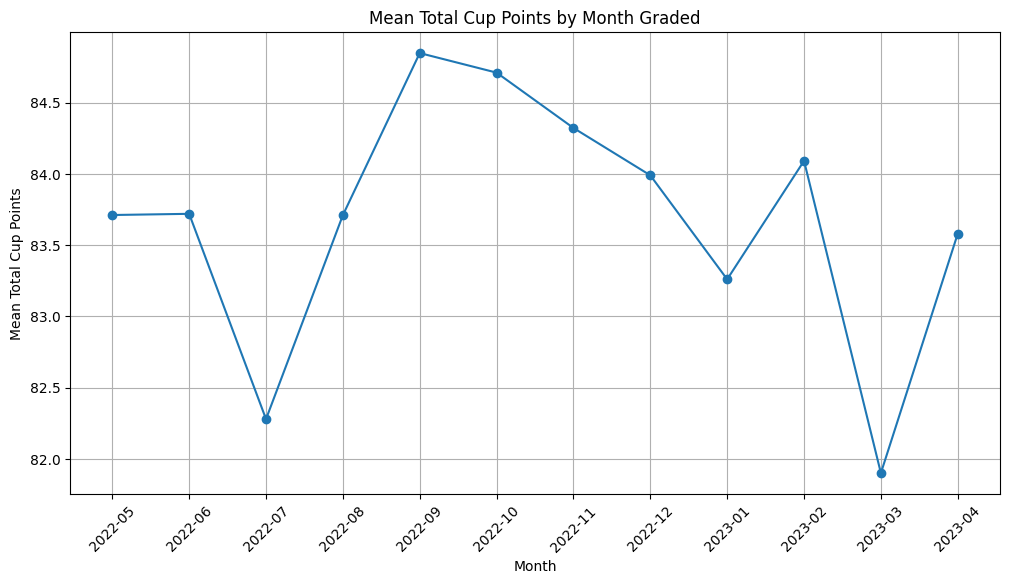

In [36]:
# Plot the mean total_cup_points for each grading_date

# Convert to datetime
coffee_quality['grading_date'] = pd.to_datetime(coffee_quality['grading_date'])

# Extract the month and year from the grading_date column
coffee_quality['month'] = coffee_quality['grading_date'].dt.to_period('M')

# Aggregate the mean total_cup_points by month
monthly_mean = coffee_quality.groupby('month')['total_cup_points'].mean()

# Plot the mean total_cup_points by month as a line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean.index.astype(str), monthly_mean.values, marker='o')
plt.title('Mean Total Cup Points by Month Graded')
plt.xlabel('Month')
plt.ylabel('Mean Total Cup Points')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

---

## Walkthrough 2.2: EDA

### Data Cleaning

In [37]:
# Check for missing values
data_dev_survey.isnull().sum()

# Remove duplicates if any
data_dev_survey = data_dev_survey.drop_duplicates()

### Data Visualization

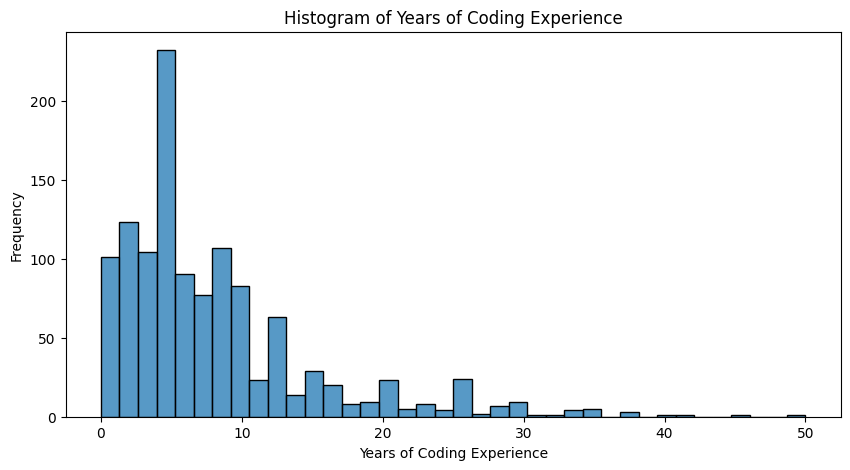

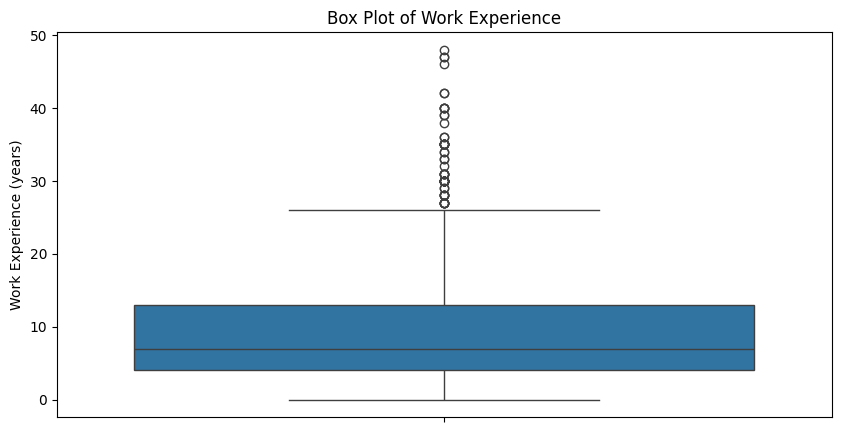

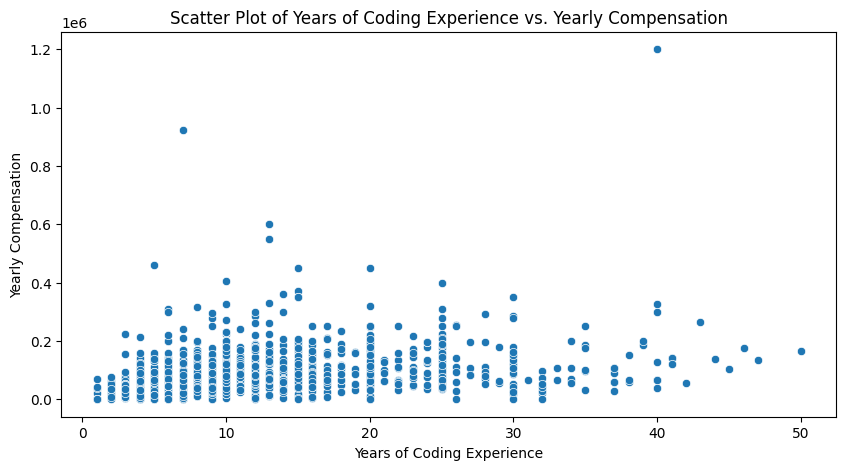

In [38]:
# Histogram for years_code_pro
plt.figure(figsize=(10, 5))
sns.histplot(data_dev_survey['years_code_pro'])
plt.title('Histogram of Years of Coding Experience')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Frequency')
plt.show()

# Box plot for work_exp
plt.figure(figsize=(10, 5))
sns.boxplot(y=data_dev_survey['work_exp'])
plt.title('Box Plot of Work Experience')
plt.ylabel('Work Experience (years)')
plt.show()

# Scatter plot for years_code_pro vs. converted_comp_yearly
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data_dev_survey['years_code_pro'], y=data_dev_survey['converted_comp_yearly'])
plt.title('Scatter Plot of Years of Coding Experience vs. Yearly Compensation')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Yearly Compensation')
plt.show()

### Summary Statistics

In [39]:
# Calculate summary statistics
data_dev_survey.describe()

,response_id,years_code,years_code_pro,work_exp,converted_comp_yearly,survey_completion_date
count,1183.000000,1182.000000,1183.000000,1183.000000,1.183000e+03,1183
mean,43949.774303,12.534687,7.961116,9.650042,9.068442e+04,2023-05-15 19:40:43.617920512
min,164.000000,1.000000,0.000000,0.000000,3.000000e+00,2023-05-01 00:00:00
25%,22733.000000,7.000000,3.000000,4.000000,4.159300e+04,2023-05-08 00:00:00
50%,43305.000000,10.000000,6.000000,7.000000,7.271400e+04,2023-05-16 00:00:00
75%,65791.000000,16.000000,10.000000,13.000000,1.200000e+05,2023-05-24 00:00:00
max,89072.000000,50.000000,50.000000,48.000000,1.200000e+06,2023-05-31 00:00:00
std,25327.979423,8.384094,7.153751,8.189750,8.189586e+04,NaN


## Exercise 2.2: EDA

### Data Cleaning

In [7]:
# Check for missing values
coffee_quality.isnull().sum()

# Remove duplicates if any
coffee_quality = coffee_quality.drop_duplicates()

country_of_origin      0
continent_of_origin    0
farm_name              2
lot_number             1
mill                   3
company                0
altitude               1
region                 2
producer               1
in_country_partner     0
harvest_year           0
grading_date           0
owner                  0
variety                6
processing_method      5
aroma                  0
flavor                 0
aftertaste             0
acidity                0
body                   0
balance                0
uniformity             0
clean_cup              0
sweetness              0
overall                0
total_cup_points       0
moisture_percentage    0
color                  0
expiration             0
certification_body     0
dtype: int64

### Data Visualization

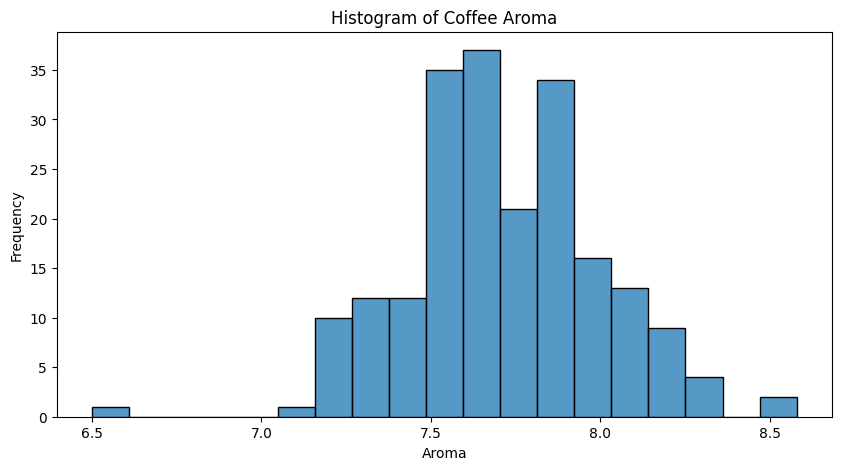

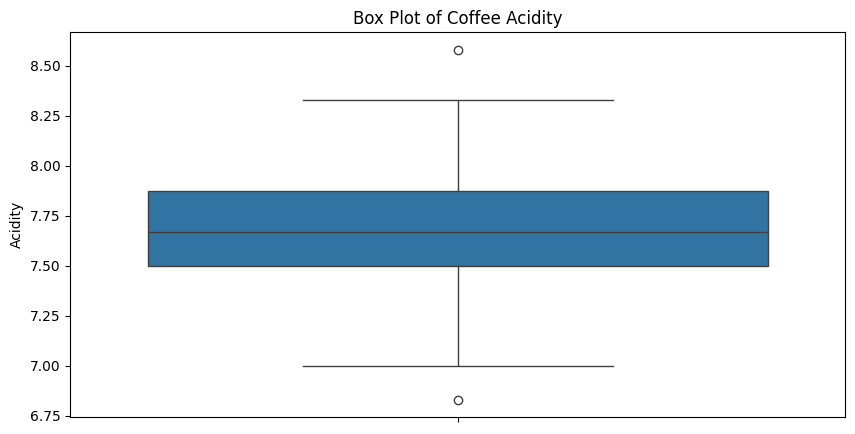

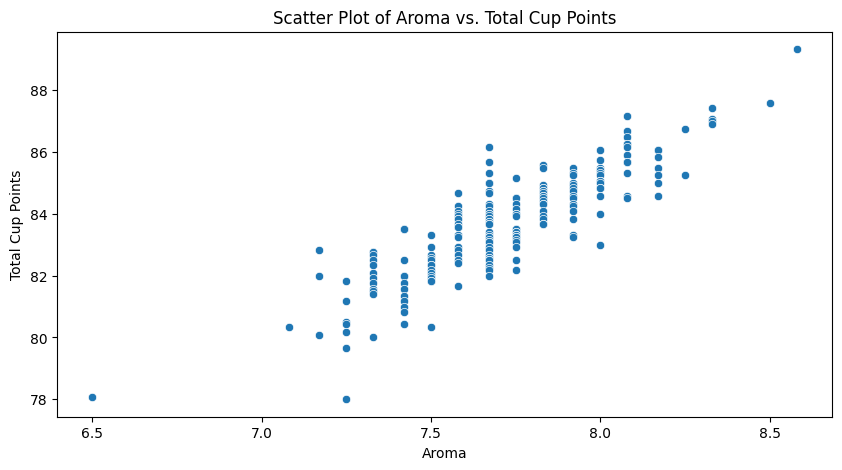

In [41]:
# Histogram for aroma
plt.figure(figsize=(10, 5));
sns.histplot(coffee_quality['aroma']);
plt.title('Histogram of Coffee Aroma');
plt.xlabel('Aroma');
plt.ylabel('Frequency');
plt.show()

# Box plot for acidity
plt.figure(figsize=(10, 5));
sns.boxplot(y=coffee_quality['acidity']);
plt.title('Box Plot of Coffee Acidity');
plt.ylabel('Acidity');
plt.show()

# Scatter plot for aroma vs. total_cup_points
plt.figure(figsize=(10, 5));
sns.scatterplot(x=coffee_quality['aroma'], y=coffee_quality['total_cup_points']);
plt.title('Scatter Plot of Aroma vs. Total Cup Points');
plt.xlabel('Aroma');
plt.ylabel('Total Cup Points');
plt.show()

### Summary Statistics

In [42]:
# Calculate summary statistics
coffee_quality.describe()

,grading_date,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,overall,total_cup_points,moisture_percentage
count,207,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.0,207.0,207.000000,207.000000,207.000000
mean,2022-11-17 11:42:36.521739008,7.721063,7.744734,7.599758,7.69029,7.640918,7.644058,9.990338,10.0,10.0,7.676812,83.706570,10.735266
min,2022-05-11 00:00:00,6.500000,6.750000,6.670000,6.83000,6.830000,6.670000,8.670000,10.0,10.0,6.670000,78.000000,0.000000
25%,2022-09-21 00:00:00,7.580000,7.580000,7.420000,7.50000,7.500000,7.500000,10.000000,10.0,10.0,7.500000,82.580000,10.100000
50%,2022-11-15 00:00:00,7.670000,7.750000,7.580000,7.67000,7.670000,7.670000,10.000000,10.0,10.0,7.670000,83.750000,10.800000
75%,2023-01-06 00:00:00,7.920000,7.920000,7.750000,7.87500,7.750000,7.790000,10.000000,10.0,10.0,7.920000,84.830000,11.500000
max,2023-04-28 00:00:00,8.580000,8.500000,8.420000,8.58000,8.250000,8.420000,10.000000,10.0,10.0,8.580000,89.330000,13.500000
std,NaN,0.287626,0.279613,0.275911,0.25951,0.233499,0.256299,0.103306,0.0,0.0,0.306359,1.730417,1.247468


## Walkthrough 2.3: Data Preprocessing

### Inspect the Data after Loading

In [43]:
# Display basic information about the dataset
data_dev_survey.info()

# Display the first few rows of the dataset
data_dev_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   response_id                 1183 non-null   int64         
 1   work_as_dev                 1183 non-null   object        
 2   age                         1183 non-null   object        
 3   employment                  1183 non-null   object        
 4   remote_work                 1183 non-null   object        
 5   coding_activities           1182 non-null   object        
 6   ed_level                    1183 non-null   object        
 7   dev_type                    1183 non-null   object        
 8   years_code                  1182 non-null   float64       
 9   years_code_pro              1183 non-null   int64         
 10  org_size                    1183 non-null   object        
 11  country                     1183 non-null   object      

,response_id,work_as_dev,age,employment,remote_work,coding_activities,ed_level,dev_type,years_code,years_code_pro,org_size,country,language_have_worked_with,language_want_to_work_with,op_sys_professional_use,ai_view,ai_trust,ic_or_manager,work_exp,industry,us_or_not,plans_to_use_ai,converted_comp_yearly,survey_completion_date
0,164,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Engineer, data",14.0,10,"1,000 to 4,999 employees",Romania,HTML/CSS;Java;JavaScript;R;SQL;VBA,PowerShell;Python;SQL,Ubuntu;Windows,Very favorable,Somewhat trust,Individual contributor,10,"Information Services, IT, Software Development...",Not US,Using,3237,2023-05-02
1,165,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Data scientist or machine learning specialist,7.0,5,10 to 19 employees,Canada,C;C++;HTML/CSS;JavaScript;Python;TypeScript,C;C++;Python,Ubuntu,Very favorable,Somewhat trust,Individual contributor,7,"Information Services, IT, Software Development...",Not US,Using,52046,2023-05-05
2,190,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Data scientist or machine learning specialist,8.0,8,500 to 999 employees,Cyprus,Bash/Shell (all shells);C#;HTML/CSS;MATLAB;Pyt...,Bash/Shell (all shells);HTML/CSS;Python;R;SQL,Ubuntu;Windows,Favorable,Somewhat trust,Individual contributor,16,"Information Services, IT, Software Development...",Not US,Using,74963,2023-05-13
3,218,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Professional development or self-paced learnin...,Some college/university study without earning ...,Database administrator,29.0,17,"1,000 to 4,999 employees",Italy,Bash/Shell (all shells);Python;SQL,Bash/Shell (all shells);Python;SQL,Red Hat;Windows,Very favorable,Somewhat trust,Individual contributor,17,Wholesale,Not US,Plan to use,56757,2023-05-28
4,220,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Engineer, data",7.0,6,2 to 9 employees,Netherlands,Bash/Shell (all shells);HTML/CSS;JavaScript;Py...,Bash/Shell (all shells);HTML/CSS;JavaScript;Py...,MacOS;Windows,Favorable,Somewhat trust,Individual contributor,7,NaN,Not US,Using,74963,2023-05-31


### Handle Missing Values

In [44]:
# Check for missing values
data_dev_survey.isnull().sum()

# Make a copy of the dataset for imputation
data_dev_survey_imputed = data_dev_survey.copy()

# Select only numeric columns
numeric_columns = data_dev_survey_imputed.select_dtypes(include=[np.number]).columns

# Fill missing values in numeric columns with the median
data_dev_survey_imputed[numeric_columns] = data_dev_survey_imputed[numeric_columns].fillna(data_dev_survey_imputed[numeric_columns].median())

# Display the first few rows of the imputed dataset
data_dev_survey_imputed.head()

,response_id,work_as_dev,age,employment,remote_work,coding_activities,ed_level,dev_type,years_code,years_code_pro,org_size,country,language_have_worked_with,language_want_to_work_with,op_sys_professional_use,ai_view,ai_trust,ic_or_manager,work_exp,industry,us_or_not,plans_to_use_ai,converted_comp_yearly,survey_completion_date
0,164,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Engineer, data",14.0,10,"1,000 to 4,999 employees",Romania,HTML/CSS;Java;JavaScript;R;SQL;VBA,PowerShell;Python;SQL,Ubuntu;Windows,Very favorable,Somewhat trust,Individual contributor,10,"Information Services, IT, Software Development...",Not US,Using,3237,2023-05-02
1,165,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Data scientist or machine learning specialist,7.0,5,10 to 19 employees,Canada,C;C++;HTML/CSS;JavaScript;Python;TypeScript,C;C++;Python,Ubuntu,Very favorable,Somewhat trust,Individual contributor,7,"Information Services, IT, Software Development...",Not US,Using,52046,2023-05-05
2,190,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Data scientist or machine learning specialist,8.0,8,500 to 999 employees,Cyprus,Bash/Shell (all shells);C#;HTML/CSS;MATLAB;Pyt...,Bash/Shell (all shells);HTML/CSS;Python;R;SQL,Ubuntu;Windows,Favorable,Somewhat trust,Individual contributor,16,"Information Services, IT, Software Development...",Not US,Using,74963,2023-05-13
3,218,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Professional development or self-paced learnin...,Some college/university study without earning ...,Database administrator,29.0,17,"1,000 to 4,999 employees",Italy,Bash/Shell (all shells);Python;SQL,Bash/Shell (all shells);Python;SQL,Red Hat;Windows,Very favorable,Somewhat trust,Individual contributor,17,Wholesale,Not US,Plan to use,56757,2023-05-28
4,220,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Engineer, data",7.0,6,2 to 9 employees,Netherlands,Bash/Shell (all shells);HTML/CSS;JavaScript;Py...,Bash/Shell (all shells);HTML/CSS;JavaScript;Py...,MacOS;Windows,Favorable,Somewhat trust,Individual contributor,7,NaN,Not US,Using,74963,2023-05-31


### Handling Outliers

In [45]:
# Select only numeric columns
numeric_data = data_dev_survey_imputed.select_dtypes(include=[np.number])

# Identify outliers using IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
outliers = numeric_data[(numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))]
print(outliers)

# Remove outliers
data_dev_survey_imputed = data_dev_survey_imputed[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

      response_id  years_code  years_code_pro  work_exp  converted_comp_yearly
0             NaN         NaN             NaN       NaN                    NaN
1             NaN         NaN             NaN       NaN                    NaN
2             NaN         NaN             NaN       NaN                    NaN
3             NaN         NaN             NaN       NaN                    NaN
4             NaN         NaN             NaN       NaN                    NaN
...           ...         ...             ...       ...                    ...
1178          NaN         NaN             NaN       NaN                    NaN
1179          NaN         NaN             NaN       NaN                    NaN
1180          NaN         NaN             NaN       NaN                    NaN
1181          NaN         NaN             NaN       NaN                    NaN
1182          NaN        39.0            38.0      39.0                    NaN

[1183 rows x 5 columns]


### Data Transformation

In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalization on converted_comp_yearly
scaler = MinMaxScaler()
data_dev_survey_imputed[['converted_comp_yearly']] = scaler.fit_transform(data_dev_survey_imputed[['converted_comp_yearly']])

# Standardization on work_exp
scaler = StandardScaler()
data_dev_survey_imputed[['work_exp']] = scaler.fit_transform(data_dev_survey_imputed[['work_exp']])

# Encoding categorical variables (country)
data_dev_survey_imputed = pd.get_dummies(data_dev_survey_imputed, columns=['country'])

### Data Visualizations on Preprocessed Data

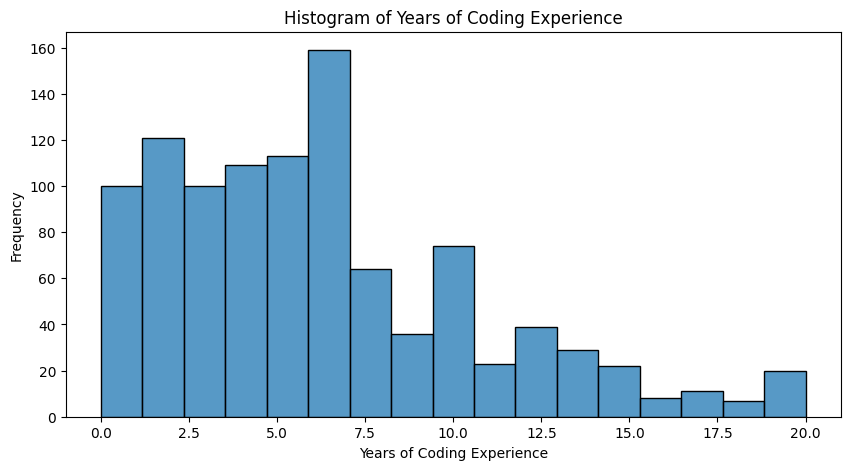

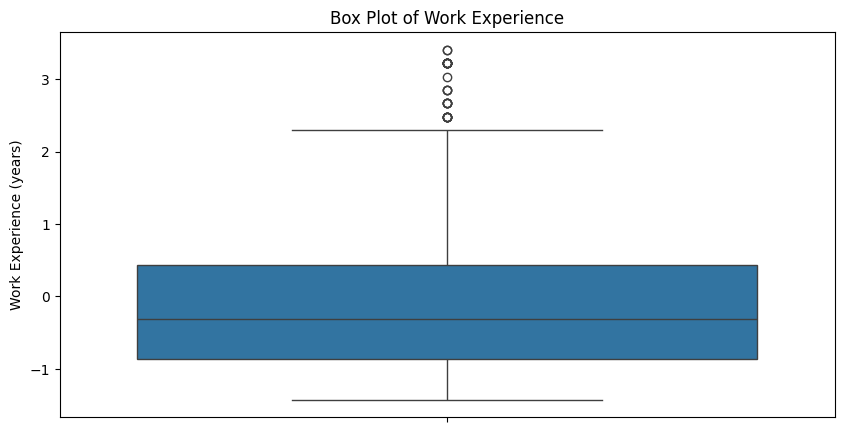

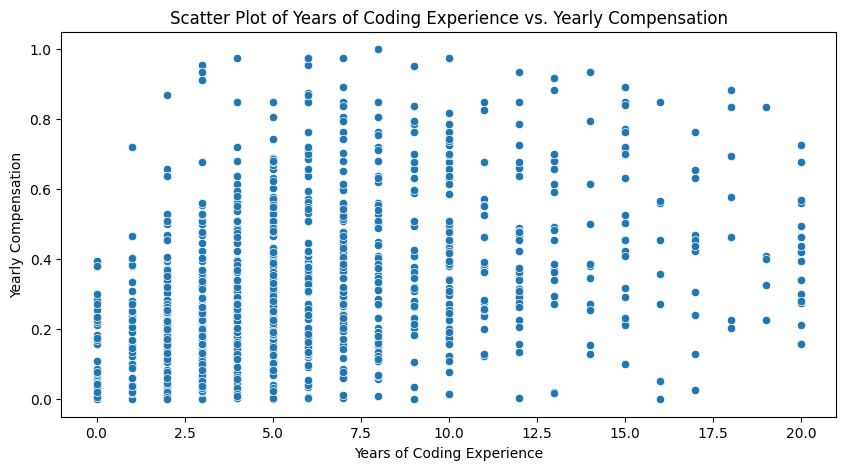

In [47]:
# Histogram for years_code_pro
plt.figure(figsize=(10, 5))
sns.histplot(data_dev_survey_imputed['years_code_pro'])
plt.title('Histogram of Years of Coding Experience')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Frequency')
plt.show()

# Box plot for work_exp
plt.figure(figsize=(10, 5))
sns.boxplot(y=data_dev_survey_imputed['work_exp'])
plt.title('Box Plot of Work Experience')
plt.ylabel('Work Experience (years)')
plt.show()

# Scatter plot for years_code_pro vs. converted_comp_yearly
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data_dev_survey_imputed['years_code_pro'], y=data_dev_survey_imputed['converted_comp_yearly'])
plt.title('Scatter Plot of Years of Coding Experience vs. Yearly Compensation')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Yearly Compensation')
plt.show()

## Exercise 2.3: Data Preprocessing

### Inspect the Data after Loading

In [48]:
# Display basic information about the dataset
coffee_quality.info()

# Display the first few rows of the dataset
coffee_quality.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   country_of_origin    207 non-null    object        
 1   continent_of_origin  207 non-null    object        
 2   farm_name            205 non-null    object        
 3   lot_number           206 non-null    object        
 4   mill                 204 non-null    object        
 5   company              207 non-null    object        
 6   altitude             206 non-null    object        
 7   region               205 non-null    object        
 8   producer             206 non-null    object        
 9   in_country_partner   207 non-null    object        
 10  harvest_year         207 non-null    object        
 11  grading_date         207 non-null    datetime64[ns]
 12  owner                207 non-null    object        
 13  variety              201 non-null  

,country_of_origin,continent_of_origin,farm_name,lot_number,mill,company,altitude,region,producer,in_country_partner,harvest_year,grading_date,owner,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,overall,total_cup_points,moisture_percentage,color,expiration,certification_body,month
0,Colombia,South America,Finca El Paraiso,CQU2022015,Finca El Paraiso,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,Japan Coffee Exchange,2021 / 2022,2022-09-21,Coffee Quality Union,Castillo,Double Anaerobic Washed,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10,10,8.58,89.33,11.8,green,"September 21st, 2023",Japan Coffee Exchange,2022-09
1,Taiwan,Asia,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,2022-11-15,Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Washed / Wet,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10,10,8.50,87.58,10.5,blue-green,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,2022-11
2,Laos,Asia,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,2022-11-15,Taiwan Coffee Laboratory 台灣咖啡研究室,Java,Semi Washed,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10,10,8.33,87.42,10.4,yellowish,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,2022-11
3,Costa Rica,North America,La Cumbre,CQU2022017,La Montana Tarrazu MIll,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,Japan Coffee Exchange,2022,2022-09-21,Coffee Quality Union,Gesha,Washed / Wet,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10,10,8.25,87.17,11.8,green,"September 21st, 2023",Japan Coffee Exchange,2022-09
4,Colombia,South America,Finca Santuario,CQU2023002,Finca Santuario,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,Japan Coffee Exchange,2022,2023-03-06,Coffee Quality Union,Red Bourbon,"Honey,Mossto",8.33,8.33,8.08,8.25,7.92,7.92,10.0,10,10,8.25,87.08,11.6,yellow-green,"March 5th, 2024",Japan Coffee Exchange,2023-03


### Handle Missing Values

In [49]:
# Check for missing values
coffee_quality.isnull().sum()

# Make a copy of the dataset for imputation
coffee_quality_imputed = coffee_quality.copy()

# Select only numeric columns
numeric_columns = coffee_quality_imputed.select_dtypes(include=[np.number]).columns

# Fill missing values in numeric columns with the median
coffee_quality_imputed[numeric_columns] = coffee_quality_imputed[numeric_columns].fillna(coffee_quality_imputed[numeric_columns].median())

# Display the first few rows of the imputed dataset
coffee_quality_imputed.head()

,country_of_origin,continent_of_origin,farm_name,lot_number,mill,company,altitude,region,producer,in_country_partner,harvest_year,grading_date,owner,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,overall,total_cup_points,moisture_percentage,color,expiration,certification_body,month
0,Colombia,South America,Finca El Paraiso,CQU2022015,Finca El Paraiso,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,Japan Coffee Exchange,2021 / 2022,2022-09-21,Coffee Quality Union,Castillo,Double Anaerobic Washed,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10,10,8.58,89.33,11.8,green,"September 21st, 2023",Japan Coffee Exchange,2022-09
1,Taiwan,Asia,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,2022-11-15,Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Washed / Wet,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10,10,8.50,87.58,10.5,blue-green,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,2022-11
2,Laos,Asia,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,2022-11-15,Taiwan Coffee Laboratory 台灣咖啡研究室,Java,Semi Washed,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10,10,8.33,87.42,10.4,yellowish,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,2022-11
3,Costa Rica,North America,La Cumbre,CQU2022017,La Montana Tarrazu MIll,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,Japan Coffee Exchange,2022,2022-09-21,Coffee Quality Union,Gesha,Washed / Wet,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10,10,8.25,87.17,11.8,green,"September 21st, 2023",Japan Coffee Exchange,2022-09
4,Colombia,South America,Finca Santuario,CQU2023002,Finca Santuario,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,Japan Coffee Exchange,2022,2023-03-06,Coffee Quality Union,Red Bourbon,"Honey,Mossto",8.33,8.33,8.08,8.25,7.92,7.92,10.0,10,10,8.25,87.08,11.6,yellow-green,"March 5th, 2024",Japan Coffee Exchange,2023-03


### Handle Outliers

In [50]:
# Select only numeric columns
numeric_data = coffee_quality_imputed.select_dtypes(include=[np.number])

# Identify outliers using IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
outliers = numeric_data[(numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))]
print(outliers)

# Remove outliers
coffee_quality_imputed = coffee_quality_imputed[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

     aroma  flavor  aftertaste  acidity  body  balance  uniformity  clean_cup  \
0     8.58    8.50        8.42     8.58  8.25     8.42         NaN        NaN   
1     8.50    8.50         NaN      NaN   NaN     8.25         NaN        NaN   
2      NaN     NaN         NaN      NaN   NaN      NaN         NaN        NaN   
3      NaN     NaN         NaN      NaN  8.17      NaN         NaN        NaN   
4      NaN     NaN         NaN      NaN   NaN      NaN         NaN        NaN   
..     ...     ...         ...      ...   ...      ...         ...        ...   
202    NaN     NaN        6.92      NaN   NaN      NaN         NaN        NaN   
203    NaN     NaN        6.75      NaN   NaN      NaN         NaN        NaN   
204    NaN     NaN         NaN      NaN  7.08      NaN         NaN        NaN   
205   6.50    6.75        6.75      NaN  7.08     7.00         NaN        NaN   
206    NaN     NaN        6.67     6.83  6.83     6.67         NaN        NaN   

     sweetness  overall  to

### Data Transformation

In [51]:
# Normalization on total_cup_points
scaler = MinMaxScaler()
coffee_quality_imputed[['total_cup_points']] = scaler.fit_transform(coffee_quality_imputed[['total_cup_points']])
# Can use this instead
coffee_quality_imputed.loc[:, ['total_cup_points']] = scaler.fit_transform(coffee_quality_imputed[['total_cup_points']])

# Standardization on acidity
scaler = StandardScaler()
coffee_quality_imputed[['acidity']] = scaler.fit_transform(coffee_quality_imputed[['acidity']])
# Or this
coffee_quality_imputed.loc[:, ['acidity']] = scaler.fit_transform(coffee_quality_imputed[['acidity']])

# Encoding categorical variables (country and continent of origin)
coffee_quality_imputed = pd.get_dummies(coffee_quality_imputed, columns=['country_of_origin', 'continent_of_origin'])

### Data Visualizations on Preprocessed Data

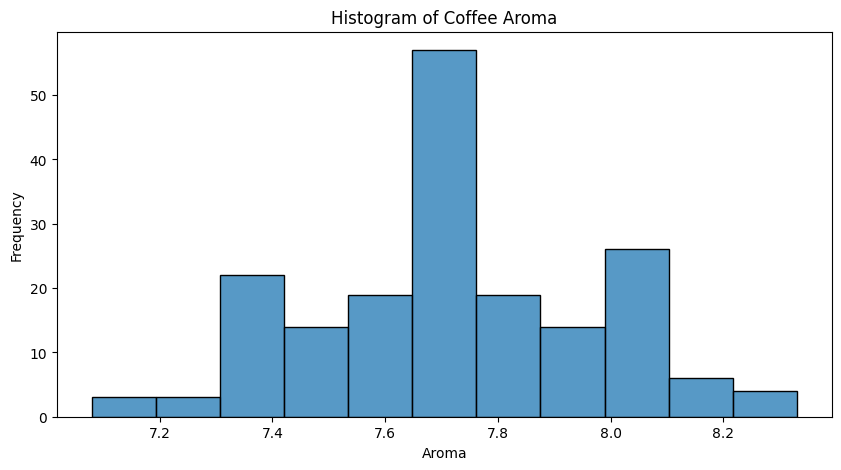

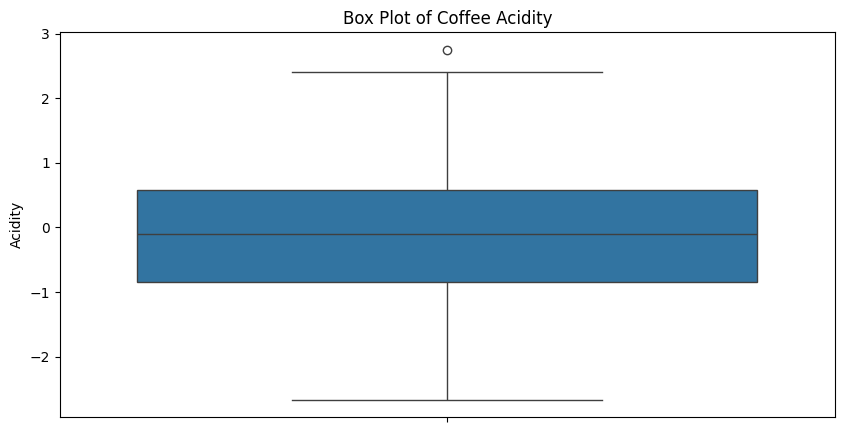

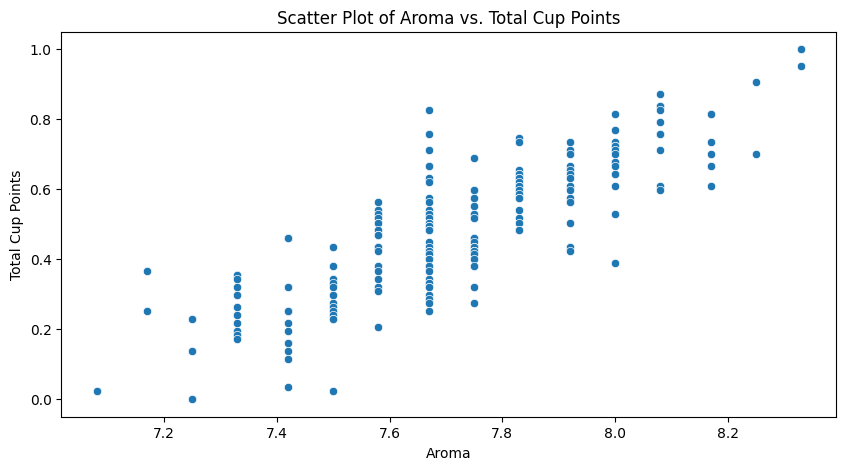

In [52]:
# Histogram for aroma
plt.figure(figsize=(10, 5))
sns.histplot(coffee_quality_imputed['aroma'])
plt.title('Histogram of Coffee Aroma')
plt.xlabel('Aroma')
plt.ylabel('Frequency')
plt.show()

# Box plot for acidity
plt.figure(figsize=(10, 5))
sns.boxplot(y=coffee_quality_imputed['acidity'])
plt.title('Box Plot of Coffee Acidity')
plt.ylabel('Acidity')
plt.show()

# Scatter plot for aroma vs. total_cup_points
plt.figure(figsize=(10, 5))
sns.scatterplot(x=coffee_quality_imputed['aroma'], y=coffee_quality_imputed['total_cup_points'])
plt.title('Scatter Plot of Aroma vs. Total Cup Points')
plt.xlabel('Aroma')
plt.ylabel('Total Cup Points')
plt.show()

---

## Walkthrough 2.4: Correlations

### Correlation Matrix

In [53]:
# Select only numeric columns
numeric_columns = data_dev_survey.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
correlation_matrix

,response_id,years_code,years_code_pro,work_exp,converted_comp_yearly
response_id,1.000000,-0.094216,-0.093518,-0.079801,-0.011179
years_code,-0.094216,1.000000,0.891028,0.794906,0.286163
years_code_pro,-0.093518,0.891028,1.000000,0.863575,0.290033
work_exp,-0.079801,0.794906,0.863575,1.000000,0.276963
converted_comp_yearly,-0.011179,0.286163,0.290033,0.276963,1.000000


### Visualize Correlations

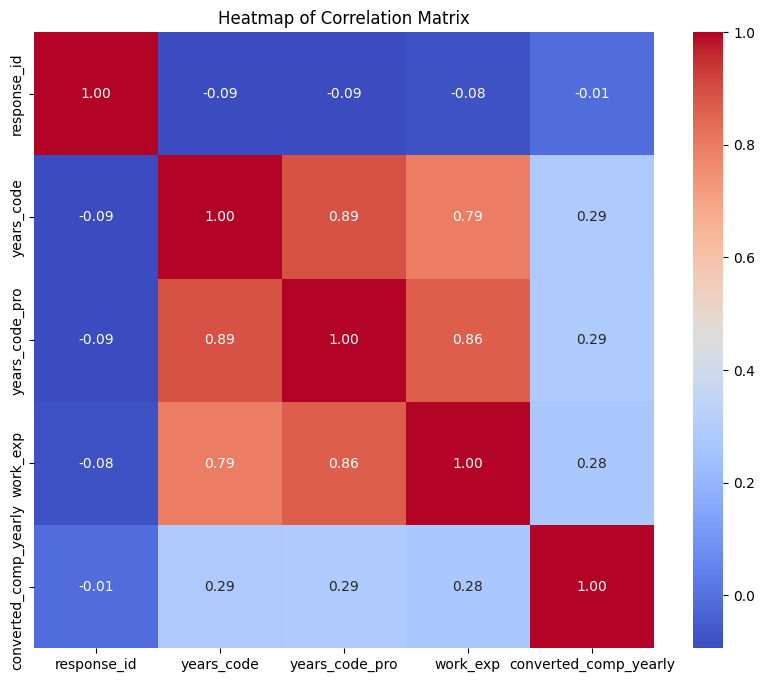

In [54]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

### Create Scatter Plots for Meaningful Correlations

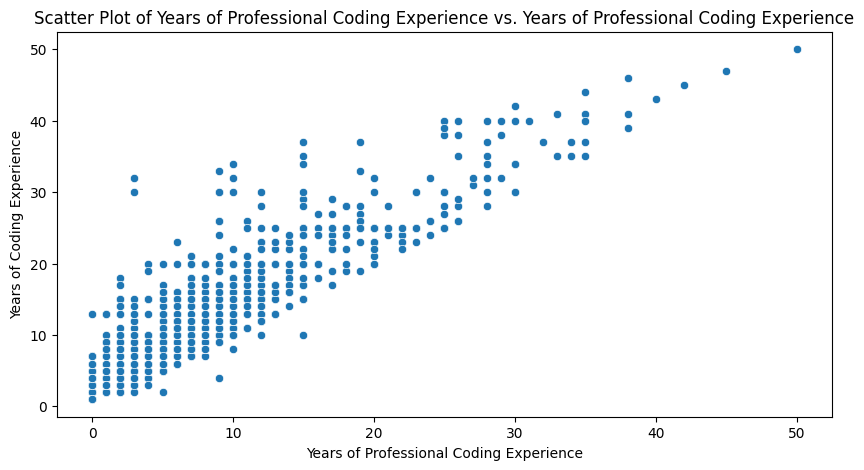

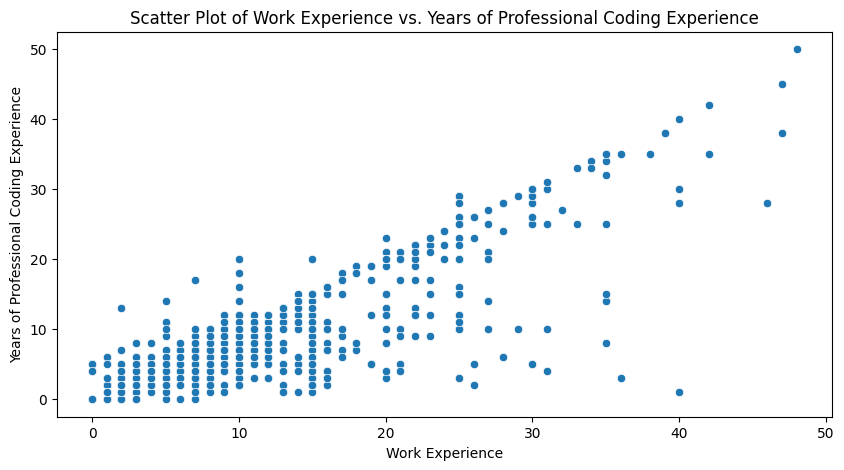

In [55]:
# Scatter plot for years_code_pro vs. years_code
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data_dev_survey['years_code_pro'], y=data_dev_survey['years_code'])
plt.title('Scatter Plot of Years of Professional Coding Experience vs. Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Years of Coding Experience')
plt.show()

# Scatter plot for work_exp vs. years_code_pro
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data_dev_survey['work_exp'], y=data_dev_survey['years_code_pro'])
plt.title('Scatter Plot of Work Experience vs. Years of Professional Coding Experience')
plt.xlabel('Work Experience')
plt.ylabel('Years of Professional Coding Experience')
plt.show()

## Exercise 2.4: Correlations

### Correlation Matrix

In [56]:
# Select only numeric columns
numeric_columns = coffee_quality.select_dtypes(include=[np.number])

# Remove clean_cup and sweetness too
numeric_columns = numeric_columns.drop(columns=['clean_cup', 'sweetness'], errors='ignore')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
correlation_matrix

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,overall,total_cup_points,moisture_percentage
aroma,1.000000,0.822779,0.793397,0.712920,0.633101,0.745648,-0.028063,0.801765,0.868919,-0.002418
flavor,0.822779,1.000000,0.876811,0.810934,0.739857,0.851786,-0.039767,0.877849,0.939124,-0.050902
aftertaste,0.793397,0.876811,1.000000,0.814439,0.738674,0.861951,-0.023926,0.865612,0.934813,-0.051115
acidity,0.712920,0.810934,0.814439,1.000000,0.765185,0.805236,-0.062564,0.840583,0.897057,-0.016751
body,0.633101,0.739857,0.738674,0.765185,1.000000,0.816098,-0.043904,0.771607,0.847216,0.009771
balance,0.745648,0.851786,0.861951,0.805236,0.816098,1.000000,-0.089064,0.884467,0.929520,-0.072660
uniformity,-0.028063,-0.039767,-0.023926,-0.062564,-0.043904,-0.089064,1.000000,-0.074602,0.003556,0.035240
overall,0.801765,0.877849,0.865612,0.840583,0.771607,0.884467,-0.074602,1.000000,0.947217,-0.113514
total_cup_points,0.868919,0.939124,0.934813,0.897057,0.847216,0.929520,0.003556,0.947217,1.000000,-0.046476
moisture_percentage,-0.002418,-0.050902,-0.051115,-0.016751,0.009771,-0.072660,0.035240,-0.113514,-0.046476,1.000000


### Visualize Correlations

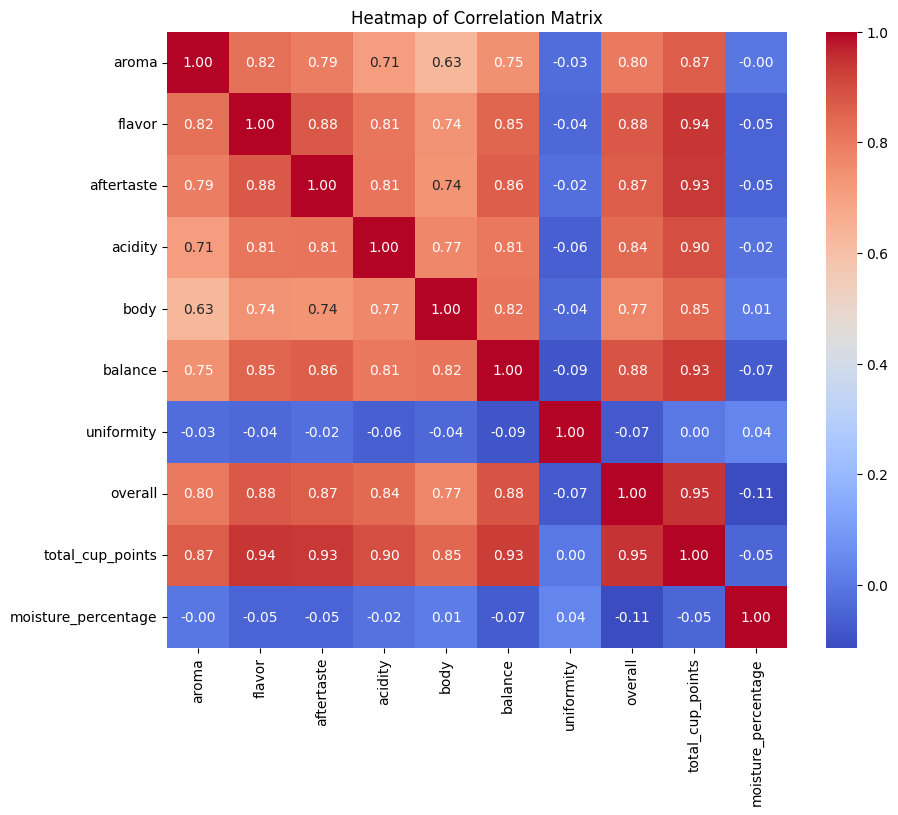

In [57]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

### Create Scatter Plots for Meaningful Correlations

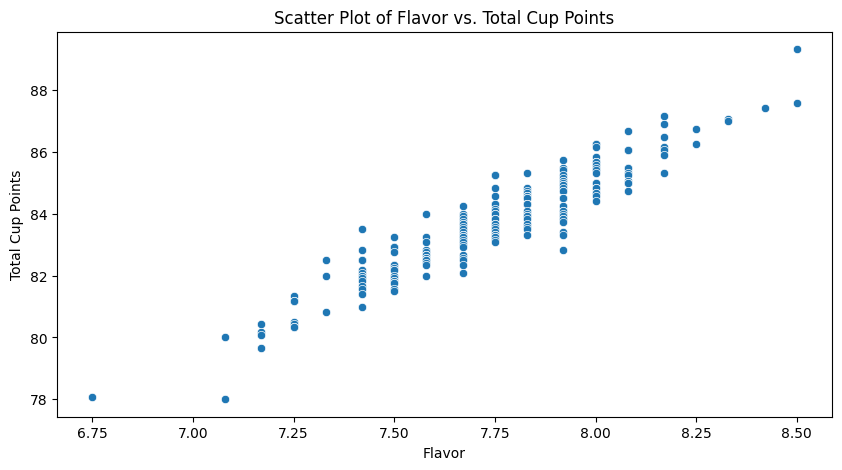

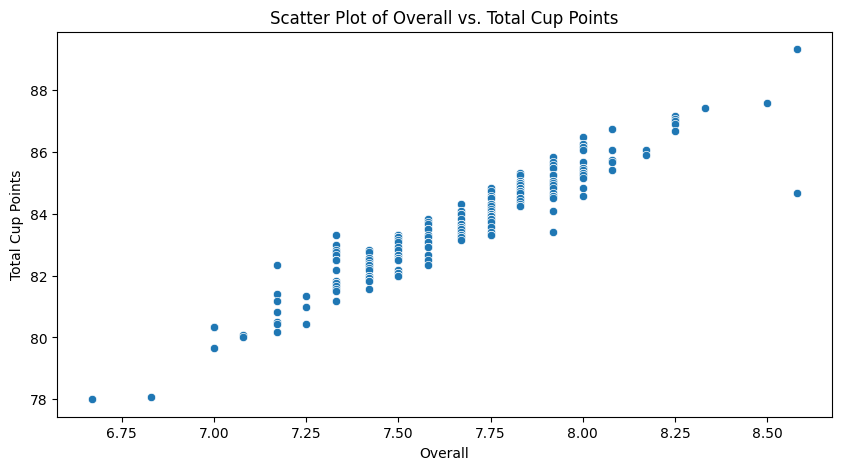

In [58]:
# Scatter plot for flavor vs. total_cup_points
plt.figure(figsize=(10, 5))
sns.scatterplot(x=coffee_quality['flavor'], y=coffee_quality['total_cup_points'])
plt.title('Scatter Plot of Flavor vs. Total Cup Points')
plt.xlabel('Flavor')
plt.ylabel('Total Cup Points')
plt.show()

# Scatter plot for overall vs. total_cup_points
plt.figure(figsize=(10, 5))
sns.scatterplot(x=coffee_quality['overall'], y=coffee_quality['total_cup_points'])
plt.title('Scatter Plot of Overall vs. Total Cup Points')
plt.xlabel('Overall')
plt.ylabel('Total Cup Points')
plt.show()

# Week 3

## Walkthrough 3.1: Simulating Distributions

### Simulating Binomial

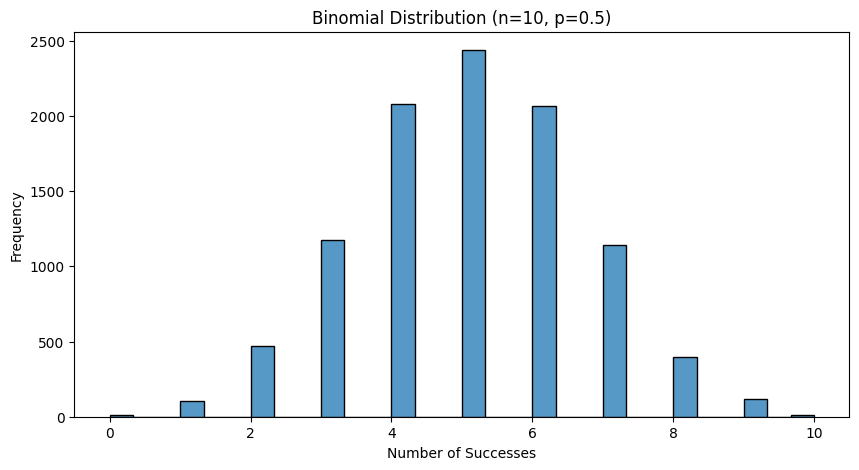

In [59]:
# Simulate binomial distribution
binom_samples = np.random.binomial(n=10, p=0.5, size=10000)

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(binom_samples, kde=False, bins=30)
plt.title('Binomial Distribution (n=10, p=0.5)')
plt.xlabel('Number of Successes')
plt.ylabel('Frequency')
plt.show()

### Simulating Normal

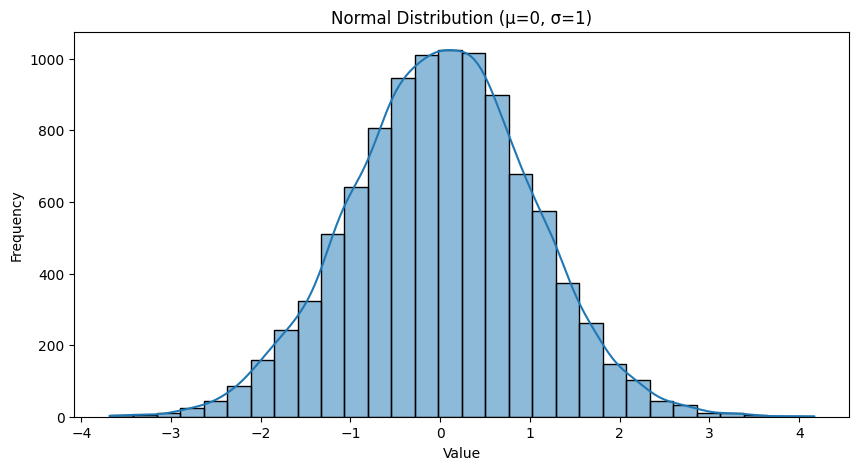

In [60]:
# Simulate normal distribution
normal_samples = np.random.normal(loc=0, scale=1, size=10000)

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(normal_samples, kde=True, bins=30)
plt.title('Normal Distribution (μ=0, σ=1)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Exercise 3.1: 

### Simulating Poisson

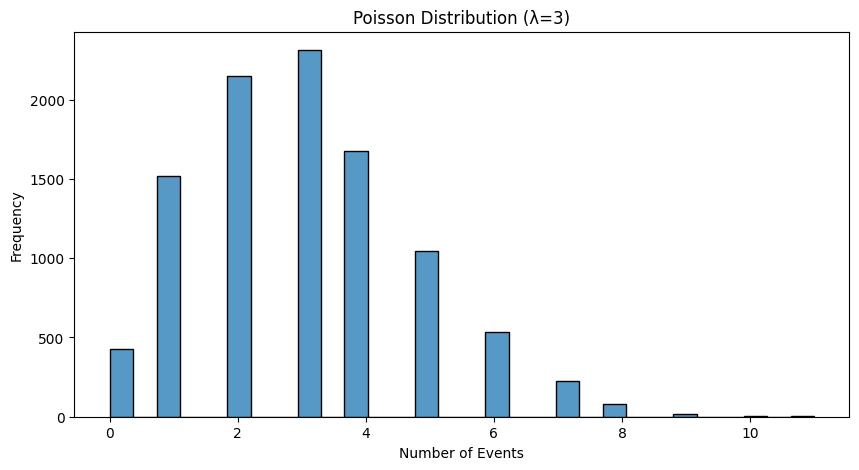

In [61]:
# Simulate Poisson distribution with lambda (lam) parameter 3
poisson_samples = np.random.poisson(lam=3, size=10000)

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(poisson_samples, kde=False, bins=30)
plt.title('Poisson Distribution (λ=3)')
plt.xlabel('Number of Events')
plt.ylabel('Frequency')
plt.show()

### Simulating Exponential

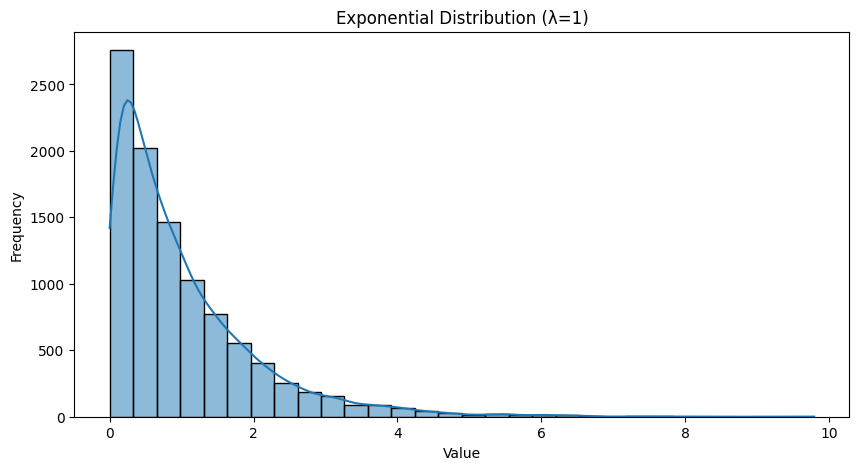

In [62]:
# Simulate exponential distribution with scale parameter 1
exponential_samples = np.random.exponential(scale=1, size=10000)

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(exponential_samples, kde=True, bins=30)
plt.title('Exponential Distribution (λ=1)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

---

## Walkthrough 3.2: t-tests

In [63]:
# One-sample t-test checking for evidence that mu compensation > 85000
salary_mean = 85000
t_stat, p_value = stats.ttest_1samp(
  data_dev_survey['converted_comp_yearly'].dropna(), 
  popmean = salary_mean,
  alternative='greater')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 2.387350503647815
P-value: 0.008563358466709872


In [64]:
# Two-sample t-test comparing compensation across plans_to_use_ai groups
# Checking for a difference
using = data_dev_survey[data_dev_survey['plans_to_use_ai'] == 'Using']['converted_comp_yearly'].dropna()
plan_to_use = data_dev_survey[data_dev_survey['plans_to_use_ai'] == 'Plan to use']['converted_comp_yearly'].dropna()
t_stat, p_value = stats.ttest_ind(using, plan_to_use, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 0.9293366153676751
P-value: 0.3529304815725288


## Exercise 3.2: t-tests

In [65]:
# One-sample t-test checking for evidence that mu flavor < 7.8
flavor_mean = 7.8
t_stat, p_value = stats.ttest_1samp(
  coffee_quality['flavor'].dropna(), 
  flavor_mean,
  alternative='less')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -2.8437004395767462
P-value: 0.0024543417348696964


In [66]:
# Two-sample t-test checking for difference in Columbia and Brazil total_cup_points
colombia = coffee_quality[coffee_quality['country_of_origin'] == 'Colombia']['total_cup_points'].dropna()
brazil = coffee_quality[coffee_quality['country_of_origin'] == 'Brazil']['total_cup_points'].dropna()
t_stat, p_value = stats.ttest_ind(colombia, brazil, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 2.3332681111615488
P-value: 0.032140770512696565


## Walkthrough 3.3: Comparative Tests

<!-- Also show EDA first to make guesses as to statistical significance -->

<!-- Look up *groups again -->

In [67]:
# Perform one-way ANOVA comparing compensation across different levels of
# remote_work
groups = data_dev_survey.groupby('remote_work')['converted_comp_yearly'].apply(list)
f_stat, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 14.664978544620904
P-value: 5.116178713207836e-07


In [68]:
# Create a contingency table of employment and remote_work
contingency_table = pd.crosstab(data_dev_survey['employment'], 
                                data_dev_survey['remote_work'])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 27.018703290562446
P-value: 0.019146108619201168


## Exercise 3.3: Comparative Tests

In [69]:
# Perform one-way ANOVA comparing total_cup_points across country_of_origin
groups = coffee_quality.groupby('country_of_origin')['total_cup_points'].apply(list)
f_stat, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 3.429178050416842
P-value: 3.3064087043319192e-06


In [70]:
# Perform a chi-square test of independence for processing_method versus
# continent_of_origin

# Create a contingency table
contingency_table = pd.crosstab(coffee_quality['processing_method'], coffee_quality['continent_of_origin'])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 56.39467201623233
P-value: 0.000767141959167542


---

## Walkthrough 3.4: Non-Parametric Tests

In [71]:
# Perform Mann-Whitney U Test comparing compensation for Remote and In-person
group1 = data_dev_survey[data_dev_survey['remote_work'] == 'Remote']['converted_comp_yearly'].dropna()
group2 = data_dev_survey[data_dev_survey['remote_work'] == 'In-person']['converted_comp_yearly'].dropna()
stat, p_value = stats.mannwhitneyu(group1, group2)

print(f"Mann-Whitney U Statistic: {stat}")
print(f"P-value: {p_value}")

Mann-Whitney U Statistic: 44426.5
P-value: 4.34784546766904e-11


In [72]:
# Perform Kruskal-Wallis H Test comparing compensation across countries
groups = data_dev_survey.groupby('country')['converted_comp_yearly'].apply(list)
stat, p_value = stats.kruskal(*groups)

print(f"Kruskal-Wallis H Statistic: {stat}")
print(f"P-value: {p_value}")

Kruskal-Wallis H Statistic: 785.9809515500227
P-value: 3.281353234345449e-110


## Exercise 3.4: Non-Parametric Tests

In [73]:
# Perform Mann-Whitney U Test comparing total_cup_points for Guatemala
# and Honduras
group1 = coffee_quality[coffee_quality['country_of_origin'] == 'Guatemala']['total_cup_points'].dropna()
group2 = coffee_quality[coffee_quality['country_of_origin'] == 'Honduras']['total_cup_points'].dropna()
stat, p_value = stats.mannwhitneyu(group1, group2)

print(f"Mann-Whitney U Statistic: {stat}")
print(f"P-value: {p_value}")

Mann-Whitney U Statistic: 217.5
P-value: 0.004309866203612997


In [74]:
# Perform Kruskal-Wallis H Test comparing total_cup_points across 
# continent_of_origin
groups = coffee_quality.groupby('continent_of_origin')['total_cup_points'].apply(list)
stat, p_value = stats.kruskal(*groups)

print(f"Kruskal-Wallis H Statistic: {stat}")
print(f"P-value: {p_value}")

Kruskal-Wallis H Statistic: 18.1515777694049
P-value: 0.00040929490942587276
